<h2>TOPIC: UBER TRIPS DATA ANALYSIS</h2>

import modules

In [14]:

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
import calendar

Importing Data

In [18]:
uber_data = pd.read_csv ('My Uber Drives - 2016.csv')
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


describe the data

In [19]:
uber_data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


check the null value

In [20]:
uber_data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

Make the heat map for null value

<AxesSubplot:>

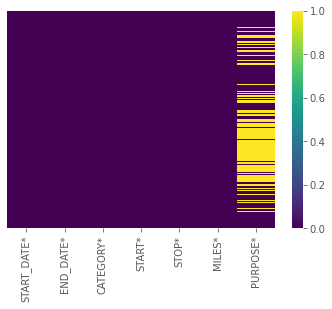

In [21]:
sns.heatmap(uber_data.isnull(), yticklabels=False, cmap = "viridis")

Drop the null value

<AxesSubplot:>

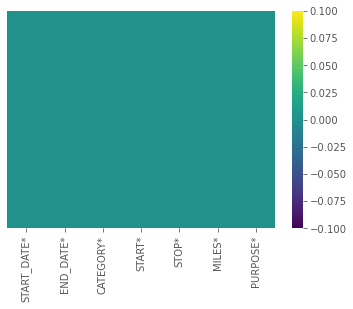

In [22]:
uber_data = uber_data.dropna()
sns.heatmap(uber_data.isnull(),yticklabels=False, cmap="viridis")

# Transforming the Data


Getting an hour, day, days of the week, a month from the date of the trip.

In [24]:
uber_data['START_DATE*'] = pd.to_datetime(uber_data['START_DATE*'], format="%m/%d/%Y %H:%M" )
uber_data['END_DATE*'] = pd.to_datetime(uber_data['END_DATE*'], format="%m/%d/%Y %H:%M")

In [25]:
hour = []
day = []
dayofweek = []
month = []
weekday = []
for x in uber_data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
uber_data['HOUR'] = hour
uber_data['DAY'] = day
uber_data['DAY_OF_WEEK'] = dayofweek
uber_data['MONTH'] = month
uber_data['WEEKDAY'] = weekday

In [26]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


Finding travelling time

In [27]:
time = []
uber_data['TRAVELLING_TIME'] = uber_data['END_DATE*'] - uber_data['START_DATE*']
for i in uber_data['TRAVELLING_TIME']:
    time.append(i.seconds/60)
uber_data['TRAVELLING_TIME'] = time
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,4.0


Calculating Avg speed of the Trip

In [28]:
uber_data['TRAVELLING_TIME'] = uber_data['TRAVELLING_TIME']/60
uber_data['SPEED'] = uber_data['MILES*']/uber_data['TRAVELLING_TIME']
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,0.100000,51.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,0.216667,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,0.233333,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,1.116667,57.044776
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,0.066667,64.500000


# Visualizing the Data

Different categories of data. From data, we can see most of the people use UBER for business purposes.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

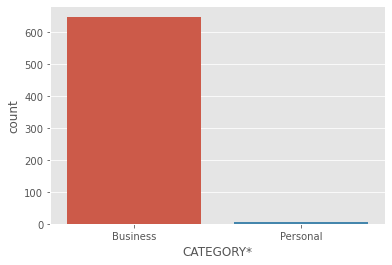

In [29]:
sns.countplot(uber_data['CATEGORY*'])

Histogram for miles. Most of people not having a long trip

<AxesSubplot:ylabel='Frequency'>

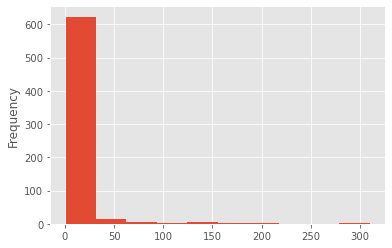

In [30]:
uber_data['MILES*'].plot.hist()

Trips for purpose. Mostly the purpose of the trip is meeting and meal/entertain.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


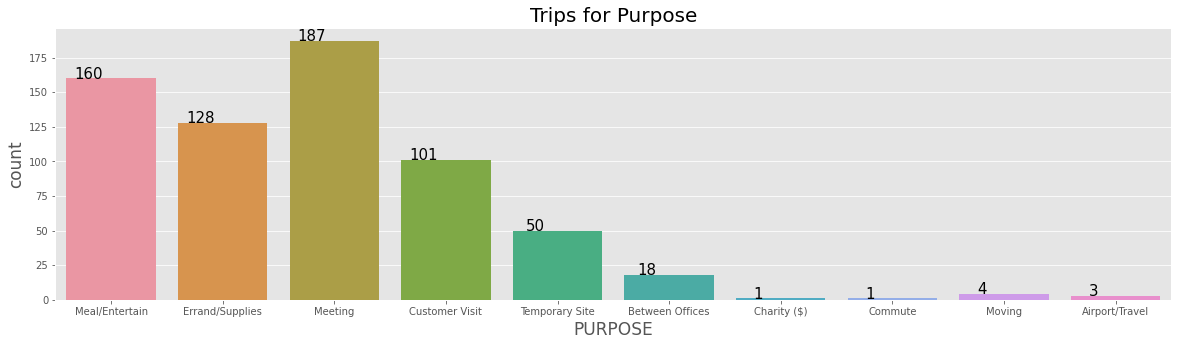

In [31]:
plt.figure(figsize = (20,5))
ax=sns.countplot(uber_data['PURPOSE*'])
ax.set_title("Trips for Purpose", fontsize = 20)
plt.xlabel("PURPOSE",fontsize=17)
plt.ylabel("count", fontsize=17)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

Trips per hour of the day.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


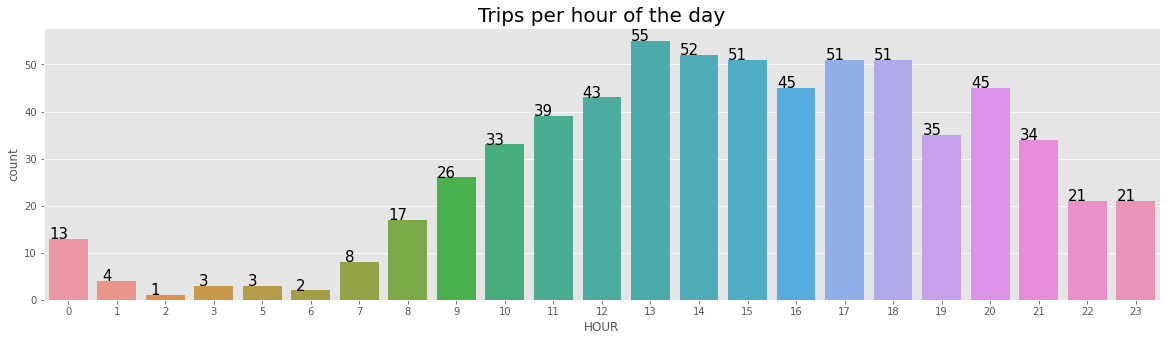

In [32]:
plt.figure(figsize = (20,5))
ax=sns.countplot(uber_data['HOUR'])
ax.set_title("Trips per hour of the day", fontsize = 20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

Trips per day of a week.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


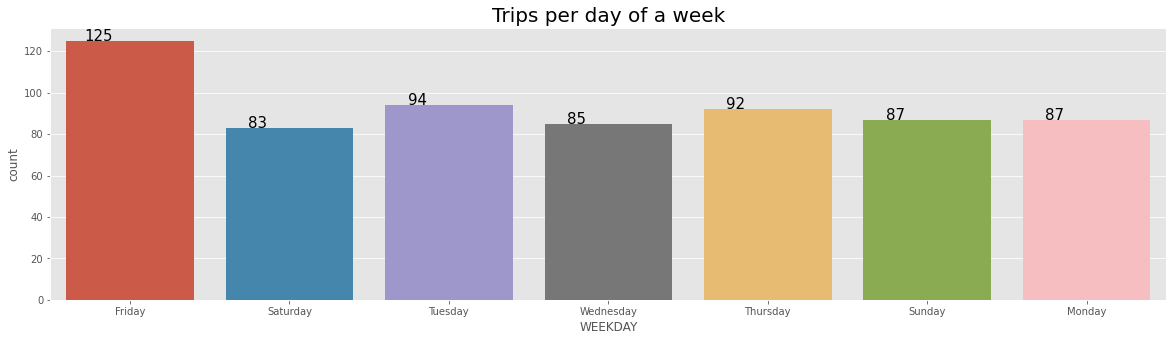

In [33]:

plt.figure(figsize = (20,5))
ax=sns.countplot(uber_data['WEEKDAY'])
ax.set_title("Trips per day of a week", fontsize = 20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

Trips per day of the month

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


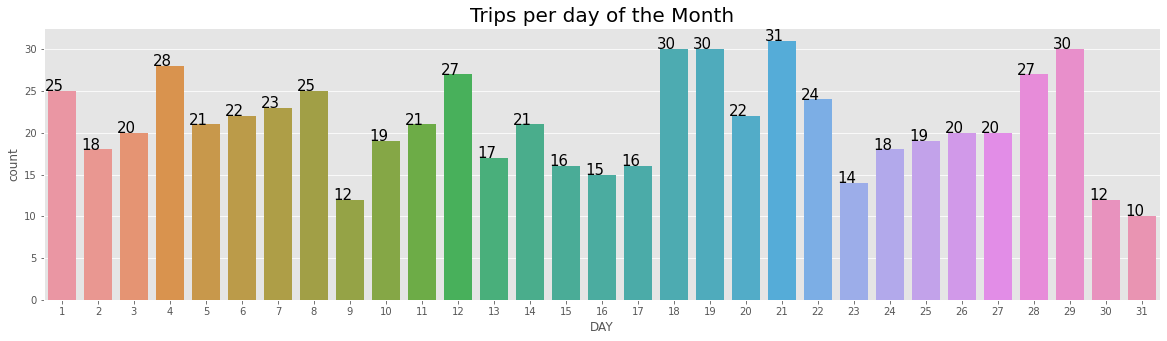

In [34]:
plt.figure(figsize = (20,5))
ax=sns.countplot(uber_data['DAY'])
ax.set_title("Trips per day of the Month", fontsize = 20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

Trips in a month.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


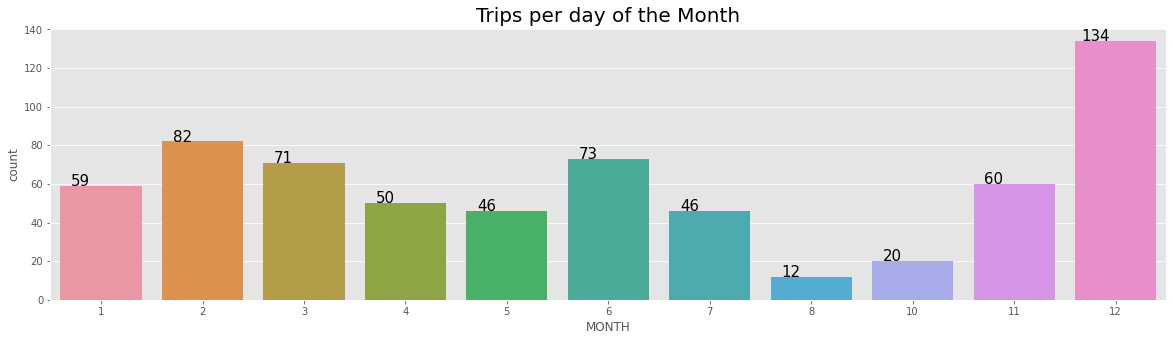

In [35]:
plt.figure(figsize = (20,5))
ax=sns.countplot(uber_data['MONTH'])
ax.set_title("Trips per day of the Month", fontsize = 20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

The starting points of trips.

<AxesSubplot:>

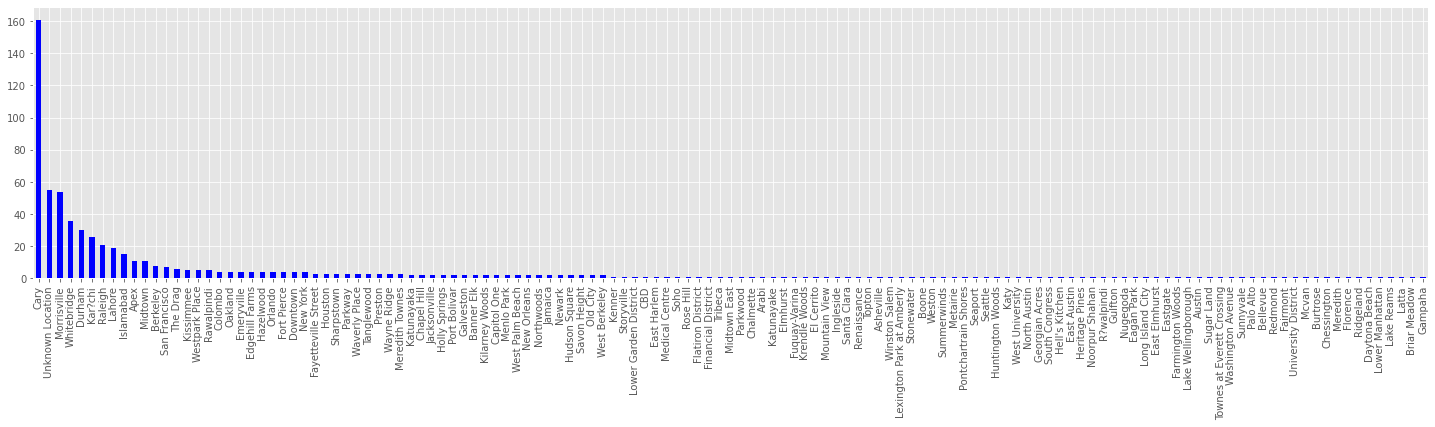

In [36]:
uber_data['START*'].value_counts().plot(kind = 'bar', figsize = (25,5), color = 'blue')

Comparing all the purpose with miles, hour, day of the month, day of the week, month, Travelling time.

<AxesSubplot:xlabel='PURPOSE*'>

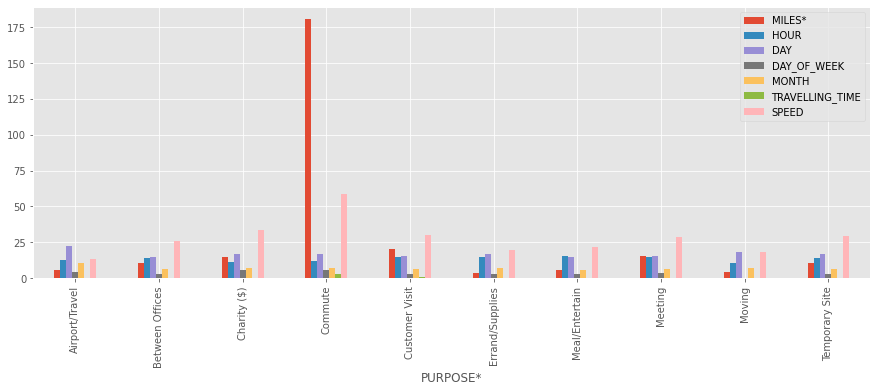

In [37]:
uber_data.groupby('PURPOSE*').mean().plot(kind='bar', figsize=(15,5))